# Testing the derivatives in the code

In [13]:
import sys
sys.path.append("/home/sven/repos/exoplanets/python")
import numpy as np
import imp
import utils
import derivatives
import mock_generation_new
import experimental_sensitivity_CL_Asimov as asimov
#import experimental_sensitivity_CL_Asimov as asimov
imp.reload(utils)
imp.reload(derivatives)
imp.reload(mock_generation_new)
imp.reload(experimental_sensitivity_CL_Asimov)

<module 'experimental_sensitivity_CL_Asimov' from '/home/sven/repos/exoplanets/python/experimental_sensitivity_CL_Asimov.py'>

In [21]:
f         = 1
nBDs      = 100
sigma     = 0.1
gamma_max = [30]

rs        = [0.4]
gamma_min = [1.5]
steps     = 200 # Need to vary
    
relT = 0.1
ex   = "fixedT10v100"
v    = 100. # km/s

# Load ATMO2020 model                                                          
path     = "/home/mariacst/exoplanets/exoplanets/data/"                          
data     = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)         
points   = np.transpose(data[0:2, :])                                            
values   = data[2]
gamma_up = np.ones(len(rs))*10.
path = "/home/mariacst/exoplanets/exoplanets/python/data_der/"

In [6]:

# Setting up seed and grabbing observations
seed      = 250
np.random.seed(seed)
(robs, sigmarobs, Tobs, sigmaTobs, Mobs,                                  
    sigmaMobs, Aobs, sigmaAobs) = mock_generation_new.mock_population_all_Asimov(nBDs, relT, 
                                    sigma, sigma, sigma, 0., 1., 1., 
                                    Tmin=0., v=v)

In [7]:
from scipy.interpolate import griddata

xi   = np.transpose(np.asarray([Aobs, Mobs]))
Teff = griddata(points, values, xi)

print(xi.shape)
print(Teff.shape)

(100, 2)
(100,)


In [8]:
# Calculate derivatives Tint wrt Age and Mass
dervTint_A = np.ones(nBDs)
dervTint_M = np.ones(nBDs)
size       = 7000
h          = 0.001

In [9]:
# The actual derivatives

for i in range(nBDs):
    dervTint_A[i] = derivatives.derivativeTint_wrt_A(Mobs[i], Aobs[i], points, values,
                                        size=size, h=h)
    dervTint_M[i] = derivatives.derivativeTint_wrt_M(Mobs[i], Aobs[i], points, values,
                                        size=size, h=h)

## Plotting the interpolated Teff function wrt Age



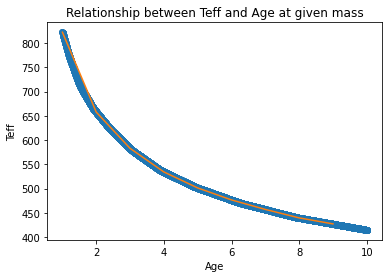

In [10]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, interp1d

ages   = np.linspace(1., 10., size)
mass   = np.ones(size)*Mobs[96]
xi     = np.transpose(np.asarray([ages, mass]))
Teff   = griddata(points, values, xi)

interpolated_fn = interp1d(ages, Teff)

xnew = np.arange(1, 10, 1)
ynew = interpolated_fn(xnew)
plt.plot(ages, Teff, 'o', xnew, ynew, '-')

plt.xlabel("Age")
plt.ylabel("Teff")
plt.title("Relationship between Teff and Age at given mass")
plt.show()

In [120]:
Aobs[97]

1.0437977571551884

(100,)
(100,)


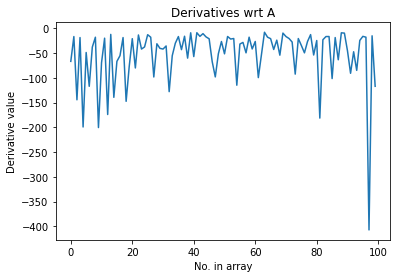

In [113]:

x_range = np.arange(0, len(dervTint_A), 1)
y_range = dervTint_A

print(x_range.shape)
print(y_range.shape)

plt.xlabel("No. in array")
plt.ylabel("Derivative value")
plt.title("Derivatives wrt A")

plt.plot(x_range, y_range)

## Applying Tcut

In [ ]:
# Timing the script
import time
start = time.time()

#f         = float(sys.argv[1])
f         = 1

nBDs      = 100
sigma     = 0.1
#gamma_max = [float(sys.argv[4])]
gamma_max = [1.4]

#rs        = [float(sys.argv[2])]
rs        = [2.5, 10, 20, 30]

#gamma_min = [float(sys.argv[3])]
gamma_min = [0.001]

steps     = 400 # Need to vary
print(steps)

relT = 0.1;
ex   = "fixedT10v100Tcut650"
v    = 100. # km/s
#Tcut = 650. # KI
Tcut = 650.

# Load ATMO2020 model
path     = "/home/mariacst/exoplanets/exoplanets/data/"
data     = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
points   = np.transpose(data[0:2, :])
values   = data[2]
gamma_up = np.ones(len(rs))*10.
path = "/home/mariacst/exoplanets/exoplanets/python/data_der/"
#path = "/home/mariacst/exoplanets/running/v100_N1e5/data_der/"

# Generate real observation
seed      = 250
np.random.seed(seed)



In [122]:
Tcut = 650. # KI

In [123]:
(robs, sigmarobs, Tobs, sigmaTobs, Mobs,
        sigmaMobs, Aobs, sigmaAobs) = mock_generation_new.mock_population_all_Asimov(nBDs, relT,
                                      sigma, sigma, sigma, 0., 1., 1.,
                                      Tmin=Tcut, v=v)

In [124]:
from scipy.interpolate import griddata

xi   = np.transpose(np.asarray([Aobs, Mobs]))
Teff = griddata(points, values, xi)

print(xi.shape)
print(Teff.shape)


# Calculate derivatives Tint wrt Age and Mass
dervTint_A = np.ones(nBDs)
dervTint_M = np.ones(nBDs)
size       = 7000
h          = 0.001

# The actual derivatives

for i in range(nBDs):
    dervTint_A[i] = derivatives.derivativeTint_wrt_A(Mobs[i], Aobs[i], points, values,
                                        size=size, h=h)
    dervTint_M[i] = derivatives.derivativeTint_wrt_M(Mobs[i], Aobs[i], points, values,
                                        size=size, h=h)

(100, 2)
(100,)


In [143]:
xi.shape

(7000, 2)

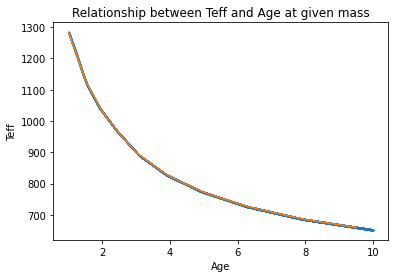

In [139]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, interp1d

ages   = np.linspace(1., 10., size)
mass   = np.ones(size)*Mobs[0]
xi     = np.transpose(np.asarray([ages, mass]))
Teff   = griddata(points, values, xi)

interpolated_fn = interp1d(ages, Teff)

xnew = np.arange(1, 10, 0.5)
ynew = interpolated_fn(xnew)
#plt.plot(ages, Teff, 'o',  xnew, ynew, '-')
plt.plot(ages, Teff, 'o', markersize = 0.5)
plt.plot(xnew, ynew, '-')
plt.xlabel("Age")
plt.ylabel("Teff")
plt.title("Relationship between Teff and Age at given mass")
plt.show()

In [3]:
fig=plt.figure(facecolor='White')

x_range = np.arange(0, len(dervTint_A), 1)
y_range = dervTint_A

print(x_range.shape)
print(y_range.shape)

plt.xlabel("No. in array")
plt.ylabel("Derivative value")
plt.title("Derivatives wrt A (Tcut)")
plt.plot(x_range, y_range)

NameError: name 'plt' is not defined

---